<a href="https://colab.research.google.com/github/sprucesunday777/nsisong-data-science/blob/main/Onlines_food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#ONLINE FOOD ANALYSIS AND PREDICTION


Online Food Order Prediction with Machine Learning by NSISONG SUNDAY


There has been a high demand for online food orders after the introduction of Swiggy and Zomato in the market. Food delivery companies use your buying habits to make the delivery process faster. The food order prediction system is one of the useful techniques these companies can use to make the entire delivery process fast.

These companies have so much data about their customers that they now know the food ordering habits of all customers. With this data, they can also predict whether or not a customer will order again from their app. It is a good technique for identifying areas, families and customer types with more business opportunities

Now let import the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Let import our dataset

In [ ]:
df=pd.read_csv('onlinefoods.csv')
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


Let carry our some EDA

In [ ]:
df.shape

(388, 13)

Our data is divided into 388 rows and 13 columns

In [ ]:
df.isnull().sum()

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64

The result below shows that' there's no missing value in the data

In [ ]:
df.columns

Let drop the column unnamed, since it's not useful to us

In [ ]:
df.drop('Unnamed: 12', axis=1).head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive


In [ ]:
df['Output'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df['Output'].value_counts()

Yes    301
No      87
Name: Output, dtype: int64

the result tells us  that 301 customers will order the food again
NOTE; YES IN THE OUTPUT COLUMNS MEANS THE CUSTOMER WILL ORDER FOOD AGAIN WHILE NO STAND FOR THOSE THAT WONT ORDER AGAIN

In [ ]:
df['Feedback'].value_counts()

Positive     317
Negative      71
Name: Feedback, dtype: int64

The result tells us that 317 gave us positive feedback which means our food delivery system is good

In [ ]:
df.columns

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Output', 'Feedback', 'Unnamed: 12'],
      dtype='object')

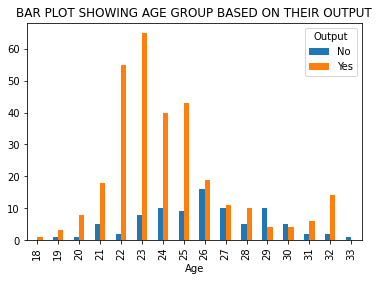

In [ ]:

df.sort_values('Age', axis=0, ascending=True, inplace=True)
pd.crosstab(df.Age,df.Output).plot(kind='bar')
plt.title('BAR PLOT SHOWING AGE GROUP BASED ON THEIR OUTPUT')
plt.show()

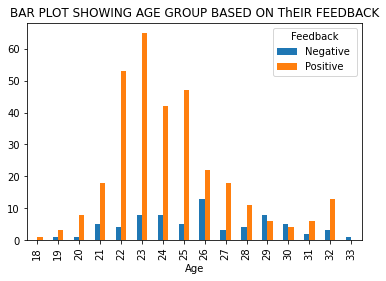

In [ ]:

df.sort_values('Age', axis=0, ascending=True, inplace=True)
pd.crosstab(df.Age,df.Feedback).plot(kind='bar')
plt.title('BAR PLOT SHOWING AGE GROUP BASED ON ThEIR FEEDBACK')
plt.show()

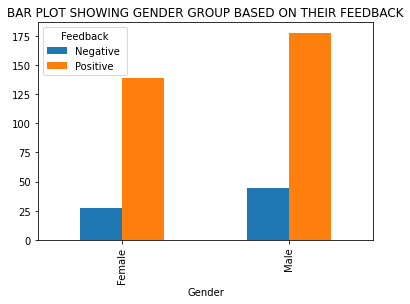

In [ ]:

df.sort_values('Gender', axis=0, ascending=True, inplace=True)
pd.crosstab(df.Gender,df.Feedback).plot(kind='bar')
plt.title('BAR PLOT SHOWING GENDER GROUP BASED ON THEIR FEEDBACK')
plt.show()

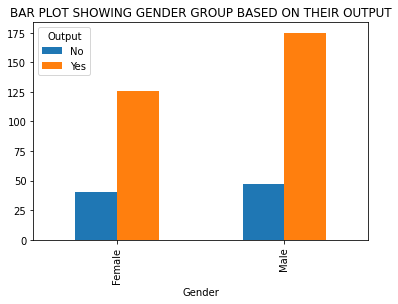

In [ ]:

df.sort_values('Gender', axis=0, ascending=True, inplace=True)
pd.crosstab(df.Gender,df.Output).plot(kind='bar')
plt.title('BAR PLOT SHOWING GENDER GROUP BASED ON THEIR OUTPUT')
plt.show()

In [ ]:
df['Occupation'].value_counts()

Student           207
Employee          118
Self Employeed     54
House wife          9
Name: Occupation, dtype: int64

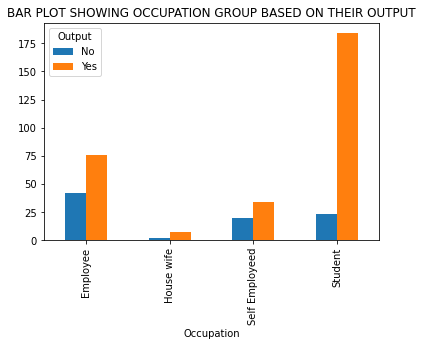

In [ ]:

df.sort_values('Occupation', axis=0, ascending=True, inplace=True)
pd.crosstab(df.Occupation,df.Output).plot(kind='bar')
plt.title('BAR PLOT SHOWING OCCUPATION GROUP BASED ON THEIR OUTPUT')
plt.show()

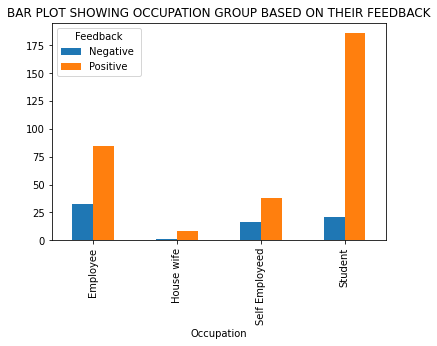

In [ ]:

df.sort_values('Occupation', axis=0, ascending=True, inplace=True)
pd.crosstab(df.Occupation,df.Feedback).plot(kind='bar')
plt.title('BAR PLOT SHOWING OCCUPATION GROUP BASED ON THEIR FEEDBACK')
plt.show()

In [ ]:
df['Monthly Income'].value_counts()

No Income          187
25001 to 50000      69
More than 50000     62
10001 to 25000      45
Below Rs.10000      25
Name: Monthly Income, dtype: int64

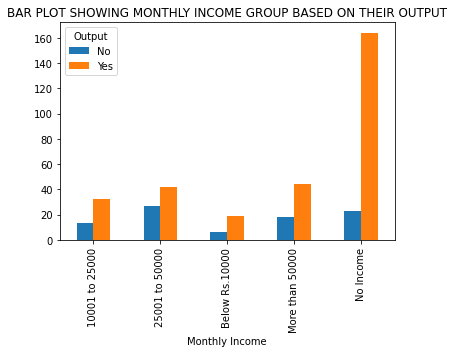

In [ ]:

pd.crosstab(df['Monthly Income'],df.Output).plot(kind='bar')
plt.title('BAR PLOT SHOWING MONTHLY INCOME GROUP BASED ON THEIR OUTPUT')
plt.show()

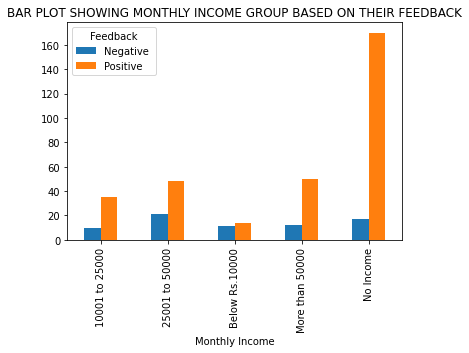

In [ ]:

pd.crosstab(df['Monthly Income'],df.Feedback).plot(kind='bar')
plt.title('BAR PLOT SHOWING MONTHLY INCOME GROUP BASED ON THEIR FEEDBACK')
plt.show()

In [ ]:
df['Educational Qualifications'].unique ()

array(['Ph.D', 'Graduate', 'Post Graduate', 'Uneducated', 'School'],
      dtype=object)

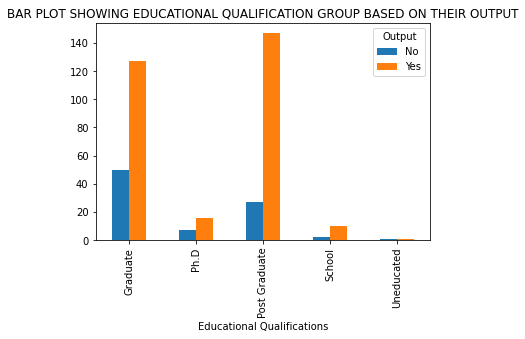

In [ ]:

pd.crosstab(df['Educational Qualifications'],df.Output).plot(kind='bar')
plt.title('BAR PLOT SHOWING EDUCATIONAL QUALIFICATION GROUP BASED ON THEIR OUTPUT')
plt.show()

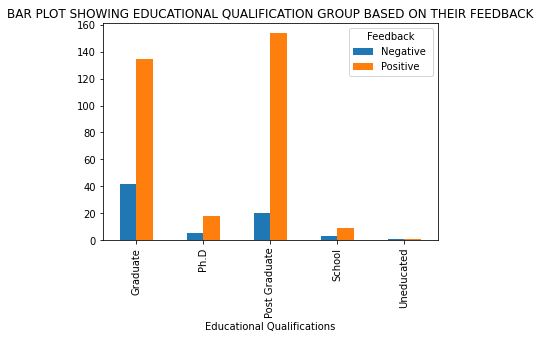

In [ ]:

pd.crosstab(df['Educational Qualifications'],df.Feedback).plot(kind='bar')
plt.title('BAR PLOT SHOWING EDUCATIONAL QUALIFICATION GROUP BASED ON THEIR FEEDBACK')
plt.show()

Since, The machine understands only numbers, we represent words in numbers

In [ ]:
df["Gender"] = df["Gender"].map({"Male": 1, "Female": 0})
df["Marital Status"] = df["Marital Status"].map({"Married": 2, 
                                                     "Single": 1, 
                                                     "Prefer not to say": 0})
df["Occupation"] = df["Occupation"].map({"Student": 1, 
                                             "Employee": 2, 
                                             "Self Employeed": 3, 
                                             "House wife": 4})
df["Educational Qualifications"] = df["Educational Qualifications"].map({"Graduate": 1, 
                                                                             "Post Graduate": 2, 
                                                                             "Ph.D": 3, "School": 4, 
                                                                             "Uneducated": 5})
df["Monthly Income"] = df["Monthly Income"].map({"No Income": 0, 
                                                     "25001 to 50000": 1, 
                                                     "More than 50000": 2, 
                                                     "10001 to 25000": 3, 
                                                     "Below Rs.10000": 4})
df["Feedback"] = df["Feedback"].map({"Positive": 1, "Negative ": 0})

In [ ]:
df.drop('Unnamed: 12', axis=1).head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
137,33,1,2,2,2,3,5,12.9980,77.6227,560005,No,0
283,24,0,1,2,1,1,3,12.8893,77.6399,560068,Yes,1
265,24,0,1,2,1,1,2,12.8893,77.6399,560068,Yes,1
238,27,1,2,2,1,1,2,12.8845,77.6036,560076,Yes,1
325,27,1,2,2,1,1,2,12.8845,77.6036,560076,Yes,1


In [ ]:
df.columns

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Output', 'Feedback', 'Unnamed: 12'],
      dtype='object')

We will not use all the columns for prediction, so let our independent variable be Age,gender,martial status,occupation,monthly income,feedback Which is represented by x
While our dependent variable be output which is represented by y

In [ ]:
x=df[['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income','Feedback']]
y=df['Output']

Let split our data into training and testing set

In [ ]:
from sklearn.model_selection import train_test_split as tts
x_test,x_train,y_test,y_train=tts(x,y)

For the prediction, we use 3 machine learning algorithm to cross check which one will give us the best score

First let use Logistics regression which it give score 0.7 accuracy

In [ ]:
from sklearn.linear_model import LogisticRegression as lr
model=lr()

In [ ]:
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
model.predict (x_test)

array(['Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No',
       'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes',

In [ ]:
model.score(x_test,y_test)

0.7938144329896907

In [ ]:
#For logistics Regression, it give us 0.793
#Accuracy

Let try SVM

In [ ]:
from sklearn.svm import SVC
mod=SVC()
mod.fit(x_train,y_train)

SVC()

In [ ]:
mod.score(x_test,y_test)

0.7800687285223368

Using SVM it give us 0.7 accuracy

now let try Random Forest machine learning algorithm

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf=RandomForestClassifier()
clf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
clf.score (x_test,y_test)

0.8316151202749141

The Random forest machine learning algorithm give 0.8 accuracy which is considered to be okay

In [ ]:
predict=clf.predict (x_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(predict,y_test))

              precision    recall  f1-score   support

          No       0.55      0.64      0.59        55
         Yes       0.91      0.88      0.89       236

    accuracy                           0.83       291
   macro avg       0.73      0.76      0.74       291
weighted avg       0.84      0.83      0.84       291



Let check the probability which the customer is likely to order again

In [ ]:
y_test_pred = model.predict_proba(x_test)

In [ ]:
result=pd.DataFrame.from_dict({"Prediction": list(y_test_pred[:,1:]) }) 
result['Actual'] = y_test
result.head()

,Prediction,Actual
0,[0.9423033157901795],Yes
1,[0.9583288500203766],Yes
2,[0.8508499315498325],Yes
3,[0.9583288500203766],Yes
4,[0.968251363248745],Yes


**Summary**
So this is how you can predict whether a customer will order food online again or not. The food order prediction system is one of the useful techniques food delivery companies can use to make the entire delivery process fast. I hope you liked this article on Online Food Delivery Prediction with Machine Learning. Feel free to ask valuable questions